<a href="https://colab.research.google.com/github/1kruidenp/PRA3024/blob/master/Week1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0, 0.5, 'Percentage of people tested positive actually tested positive')

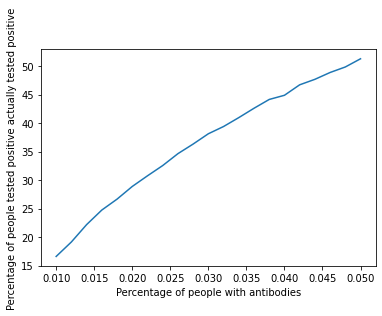

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Percentage of population having antibodies
Per_Anti=0.01
#Number of population we will be testing
Population=500000
#Percentage of positive test being real positive
Per_PTP=0.99
#Percentage of positive test being false negative
Per_PTN=0.01
#Percentage of negative test being real negative
Per_NTN=0.95
#Percentage of negative test being fake positive
Per_NTP=0.05



Ar=np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti])
Dataset=list(Ar)
print("The dataset: " + str(Dataset))

Pop_RP=Dataset.count(1)
Pop_RN=Dataset.count(0)
print("Population with antibodies: " + str(Pop_RP))



def PositiveTest(Data, Per0, Per1):
  #99% of real positive become tested positive and 1% will become tested negative
  #PTP=Positive tested positive
  #PTN=Positive tested negative
  PosTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return PosTest

def NegativeTest(Data, Per0, Per1):
  #95% of real negative become tested negative and 5% will become tested positive
  #NTN=Negative tested Negative
  #NTP=Negative tested Positive
  NegTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return NegTest

PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
Pop_PTP=PosTest.count(1)
Pop_PTN=PosTest.count(0)

NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
Pop_NTN=NegTest.count(0)
Pop_NTP=NegTest.count(1)

print("Population of Positive people tested positive: " + str(Pop_PTP))
print("Population of Positive people tested negative: " + str(Pop_PTN))
print("Population of Negative people tested negative: " + str(Pop_NTN))
print("Population of Negative people tested positive: " + str(Pop_NTP))

def chance_Pos(PTP, NTP):
  Chance=(PTP/(PTP+NTP))*100
  return Chance
def chance_Neg(NTN, PTN):
  Chance=(NTN/(NTN+PTN))*100
  return Chance

print("Percentage of people tested positive actually being positive: " + str(chance_Pos(Pop_PTP, Pop_NTP)))
print("Percentage of people tested negative actually being negative: " + str(chance_Neg(Pop_NTN, Pop_PTN)))

#we have to add 0.005 to Per_Anti until chance_Pos become >=0.5
print("")
print("")

import matplotlib.pyplot as plt
fig_dataX=[0]
fig_dataY=[0]

i=0
while chance_Pos(Pop_PTP, Pop_NTP)<50:
 
  
  Dataset=list(np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti]))

  Pop_RP=Dataset.count(1)
  Pop_RN=Dataset.count(0)
  PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
  Pop_PTP=PosTest.count(1)
  Pop_PTN=PosTest.count(0)

  NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
  Pop_NTN=NegTest.count(0)
  Pop_NTP=NegTest.count(1)
  fig_dataX[i]=Per_Anti
  fig_dataY[i]=chance_Pos(Pop_PTP, Pop_NTP)
  fig_dataX.append(1)
  fig_dataY.append(1)
  i+=1
  Per_Anti = Per_Anti+0.002



fig_dataX.pop()
fig_dataY.pop()


#Increasing population smoothes curve
#For 50% of positive tests you would need 5% of population to have antibodies
plt.plot(fig_dataX,fig_dataY)
plt.xlabel("Percentage of people with antibodies")
plt.ylabel("Percentage of people tested positive actually tested positive")




  
    